In [1]:
import warnings
import math
# Manipulation & visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Preprocessing & Data Scaling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Regression Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
# Validations
from scipy.stats import shapiro, kstest, anderson
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Warnings handling
warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\himan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_excel("crop yield data sheet.xlsx",nrows=100, header=0)
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230,80,28,80,24,20,12.0
1,480,60,36,70,20,18,8.0
2,1250,75,29,78,22,19,11.0
3,450,65,35,70,19,18,9.0
4,1200,80,27,79,22,19,11.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     int64  
 1   Fertilizer      99 non-null     int64  
 2   Temperatue      99 non-null     int64  
 3   Nitrogen (N)    99 non-null     int64  
 4   Phosphorus (P)  99 non-null     int64  
 5   Potassium (K)   99 non-null     int64  
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(1), int64(6)
memory usage: 5.5 KB


In [9]:
df.describe().T.style.bar(subset=["mean","50%", "max"], color="#33858d")


,count,mean,std,min,25%,50%,75%,max
Rain Fall (mm),99.000000,849.797980,400.042676,400.000000,450.000000,1150.000000,1237.500000,1300.000000
Fertilizer,99.000000,67.808081,10.028202,50.000000,60.000000,70.000000,77.000000,80.000000
Temperatue,99.000000,32.393939,5.426350,24.000000,28.000000,29.000000,38.000000,40.000000
Nitrogen (N),99.000000,70.737374,6.677079,59.000000,65.000000,71.000000,77.000000,80.000000
Phosphorus (P),99.000000,21.131313,1.951695,18.000000,19.500000,21.000000,23.000000,25.000000
Potassium (K),99.000000,18.060606,1.817254,15.000000,16.000000,19.000000,19.000000,22.000000
Yeild (Q/acre),99.000000,9.050505,1.965902,5.500000,7.000000,9.000000,11.000000,12.000000


In [6]:
df.shape

(99, 7)

In [7]:
df.columns

Index(['Rain Fall (mm)', 'Fertilizer', 'Temperatue', 'Nitrogen (N)',
       'Phosphorus (P)', 'Potassium (K)', 'Yeild (Q/acre)'],
      dtype='object')

In [8]:
df.isnull().sum()

Rain Fall (mm)    0
Fertilizer        0
Temperatue        0
Nitrogen (N)      0
Phosphorus (P)    0
Potassium (K)     0
Yeild (Q/acre)    0
dtype: int64

In [10]:
for i,column in enumerate(df.columns):
    print(f"\033[1mNormality Test for the {column.upper()} column:\033[0m")
    stat_1, p_shapiro = shapiro(df[column])
    if p_shapiro > 0.05:
        print("This column follows a normal distribution")
        print(f"Valor Shapiro-Wilk (p): {p_shapiro}")
    else:
        print("By Shapiro-Wilk this column do not follows a normal distribution")
    stat_2, p_Smirnov = kstest(df[column], "norm")
    if p_Smirnov > 0.05:
        print("This column a normal distribution")
        print(f"Valor Kolmogorov-Smirnov (p): {p_shapiro}")
    else:
        print("By Kolmogorov-Smirnov this column do not follows a normal distribution")
    stat_3 = anderson(df[column])
    if stat_3.statistic < stat_3.critical_values[2]:
        print("This column follows a normal distribution")    
        print('Critica statistics:', stat_3.statistic)
        print('Significance levels:', stat_3.significance_level)
        print("-------------------------\n")
    else:
        print("By Anderson-Darling this column do not follows a normal distribution\n")

Normality Test for the RAIN FALL (MM) column:
By Shapiro-Wilk this column do not follows a normal distribution
By Kolmogorov-Smirnov this column do not follows a normal distribution
By Anderson-Darling this column do not follows a normal distribution

Normality Test for the FERTILIZER column:
By Shapiro-Wilk this column do not follows a normal distribution
By Kolmogorov-Smirnov this column do not follows a normal distribution
By Anderson-Darling this column do not follows a normal distribution

Normality Test for the TEMPERATUE column:
By Shapiro-Wilk this column do not follows a normal distribution
By Kolmogorov-Smirnov this column do not follows a normal distribution
By Anderson-Darling this column do not follows a normal distribution

Normality Test for the NITROGEN (N) column:
By Shapiro-Wilk this column do not follows a normal distribution
By Kolmogorov-Smirnov this column do not follows a normal distribution
By Anderson-Darling this column do not follows a normal distribution

No

In [12]:
colors = sns.color_palette(palette = 'tab10', n_colors = len(df.columns)+2)


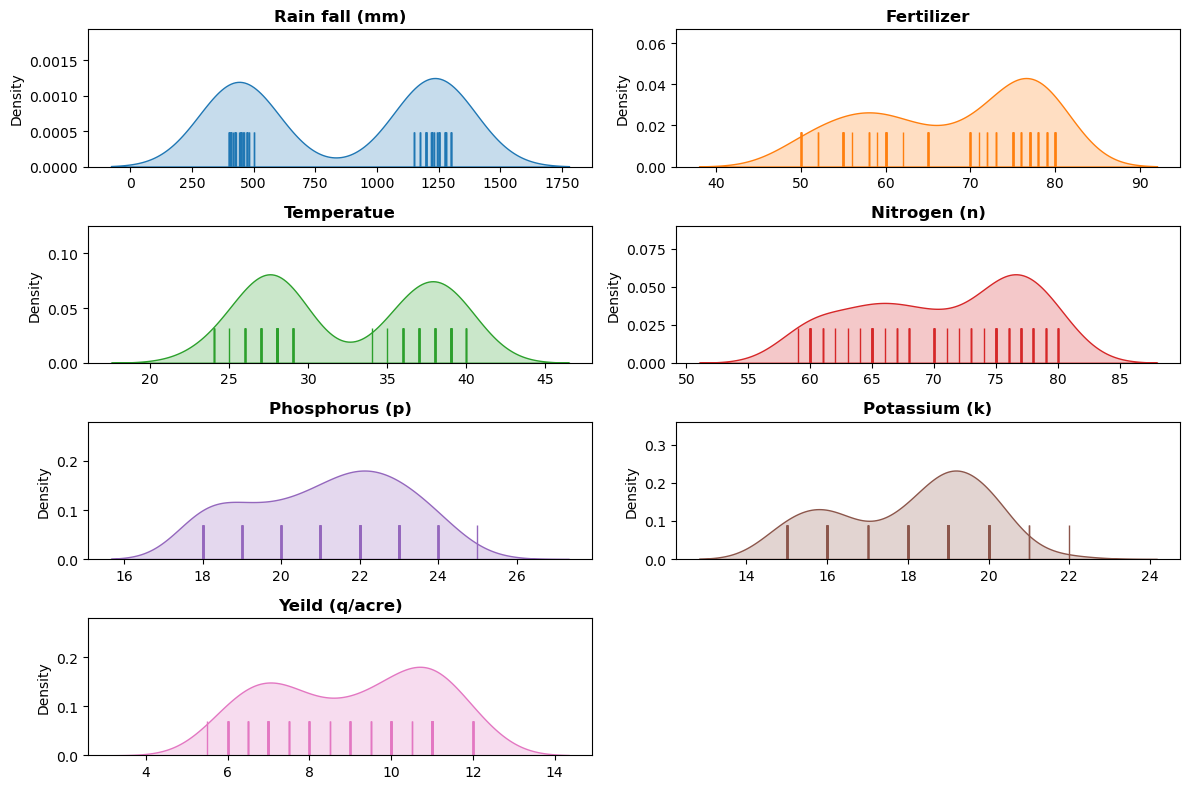

In [13]:
fig, ax = plt.subplots(nrows=4,ncols=2, figsize=(12, 8),gridspec_kw={'width_ratios': [1, 1]})
ax = ax.flat

for i,column in enumerate(df.columns):
    sns.kdeplot(df[column], ax=ax[i], color=colors[i], fill=True)
    sns.rugplot(df[column], ax=ax[i], color = colors[i], height=0.25, expand_margins=True)
    ax[i].set_title(f"{column.capitalize()}", fontweight="bold")
    ax[i].set_xlabel("")

fig.delaxes(ax[7])
plt.tight_layout()
plt.show()

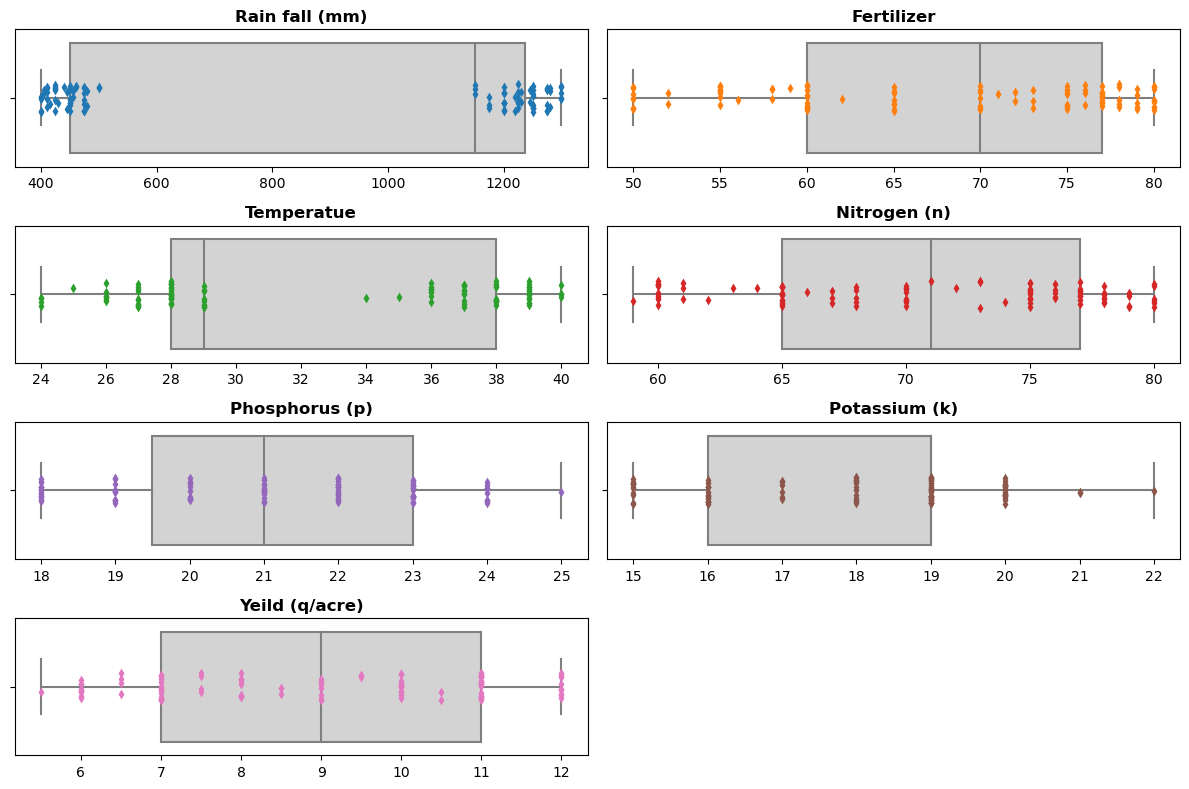

In [14]:
# In this section we will indetify and display the outliers by columns
fig, ax = plt.subplots(nrows=4,ncols=2, figsize=(12, 8),gridspec_kw={'width_ratios': [1, 1]})
ax = ax.flat

for i,column in enumerate(df.columns):
    sns.stripplot(x=df[column],ax = ax[i],color = colors[i], marker="d")
    sns.boxplot(x=df[column], ax = ax[i], color= "lightgray") 
    ax[i].set_title(f"{column.capitalize()}", fontweight="bold")
    ax[i].set_xlabel("")

fig.delaxes(ax[7])
plt.tight_layout()
plt.show()

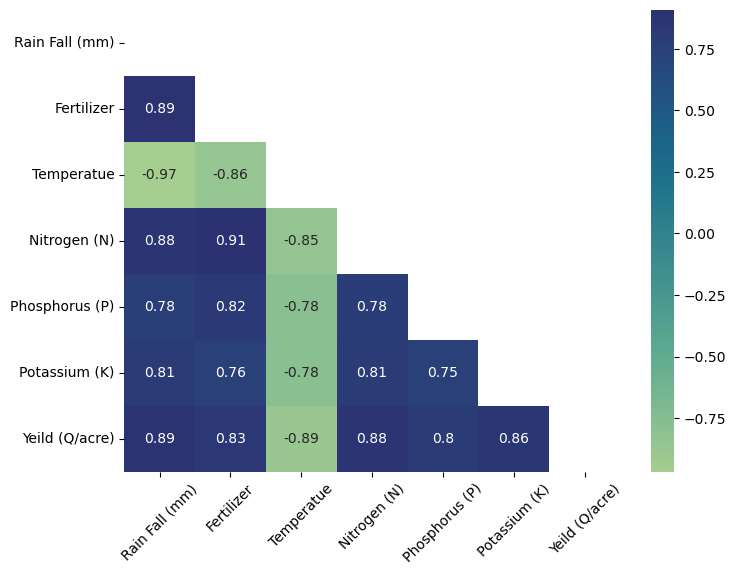

In [15]:
# Creatin a Heatmap to observe the correlation between our variables
plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(df.corr(), dtype = bool))
sns.heatmap(df.corr(), cmap="crest", mask=mask, annot=True)
plt.xticks(rotation=45)
plt.show()

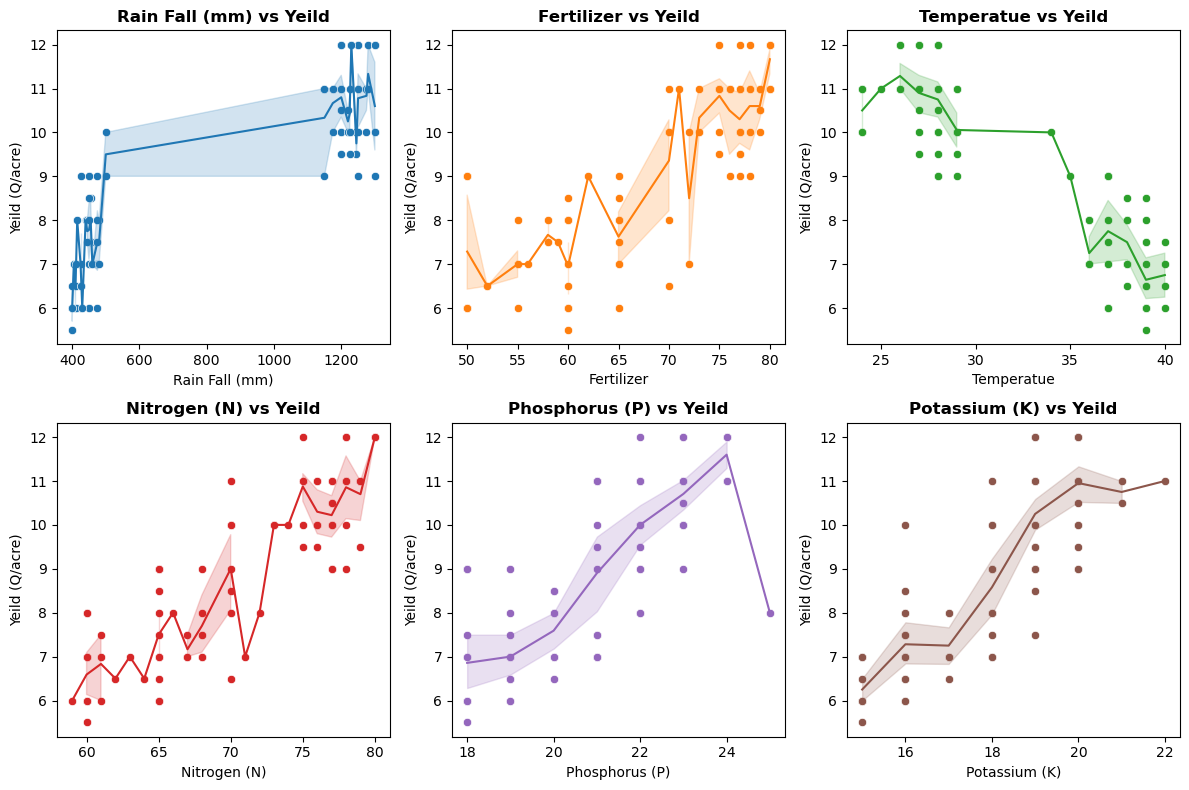

In [16]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(12, 8))
ax = ax.flat

for i,column in enumerate(df.columns[:6]):
    sns.scatterplot(data=df, x=column,y="Yeild (Q/acre)",color=colors[i], ax=ax[i])
    sns.lineplot(data=df, x=column,y="Yeild (Q/acre)",color=colors[i], ax=ax[i])
    ax[i].set_title(f"{column} vs Yeild", fontweight="bold")

plt.tight_layout()
plt.show()

In [17]:
df.sample(5)


,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
20,410,50,37,59,19,15,6.0
97,480,65,36,68,21,16,7.0
84,1300,76,28,77,22,20,9.0
43,410,60,39,65,18,15,6.0
8,1200,77,27,78,23,20,12.0


In [18]:
#Standardizing data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.sample(5)

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
50,0.942678,1.121724,-1.554757,1.243759,0.447359,0.519561,0.996701
19,0.879867,1.021498,-0.999086,1.093230,0.962342,0.519561,1.507962
44,1.005489,1.221950,-1.184310,1.093230,0.962342,0.519561,0.996701
77,-1.130097,-1.784837,1.408823,-1.616278,-1.612572,-1.692764,-1.559604
23,0.942678,0.520367,-0.628638,0.340589,0.962342,1.072642,0.485440


In [19]:
x = data_scaled.drop(columns="Yeild (Q/acre)")
y = data_scaled["Yeild (Q/acre)"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [20]:
def print_results(results):
    mean = results.mean()
    standard_deviation = results.std()
    return mean, standard_deviation   

In [21]:
models = [
    LinearRegression(),
    Lasso(alpha=1.0, random_state=42),
    Ridge(),
    DecisionTreeRegressor(max_depth=5,min_samples_split=2 ,random_state=42),
    KNeighborsRegressor(),
    RandomForestRegressor(random_state=42), 
    SVR(kernel="rbf", C=1, gamma="scale"),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
]

In [22]:
# Adjustaing models
starndar_results = None

for i, model in enumerate(models):
    # Cross validation
    scores = cross_val_score(model, X_train, y_train, cv=7)
    mean, stdev = print_results(scores)
    
    # Adjusting model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluating model performance
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    row = pd.DataFrame({"model":type(model).__name__,"mean":mean,"lower_limit":mean-2*stdev,
             "upper_limit":mean+2*stdev, "MAE":mae, "MSE":mse, "r2":r2}, index = [i])
    starndar_results = pd.concat([starndar_results, row])

In [23]:
x_s= df.drop(columns="Yeild (Q/acre)")
y_s = df["Yeild (Q/acre)"]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(x_s, y_s, test_size=0.25, random_state=42)

In [24]:
# Min-Max Scaling values
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_s)
X_test_scaled = scaler.transform(X_test_s)
pd.DataFrame(X_train_scaled, columns=x_s.columns).head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K)
0,0.055556,0.166667,0.8750,0.285714,0.142857,0.333333
1,0.000000,0.000000,0.9375,0.047619,0.000000,0.000000
2,0.055556,0.500000,0.8750,0.047619,0.285714,0.166667
3,0.016667,0.166667,0.8750,0.285714,0.142857,0.333333
4,0.011111,0.166667,0.8750,0.428571,0.285714,0.166667


In [25]:
# Adjustaing models
minmax_results = None

for i, model in enumerate(models):
    # Cross validation
    scores_S = cross_val_score(model,X_train_scaled, y_train_s, cv=7)
    mean_s, stdev_s = print_results(scores_S)
    
    # Adjusting model
    model.fit(X_train_scaled, y_train_s)
    y_pred = model.predict(X_test_scaled)

    # Evaluating model performance
    mse = mean_squared_error(y_test_s, y_pred)
    mae = mean_absolute_error(y_test_s, y_pred)
    r2 = r2_score(y_test_s, y_pred)
    row = pd.DataFrame({"model":type(model).__name__,"mean":mean_s,"lower_limit":mean_s-2*stdev_s,
             "upper_limit":mean_s+2*stdev_s, "MAE":mae, "MSE":mse, "r2":r2}, index = [i])
    minmax_results = pd.concat([minmax_results, row], ignore_index=True)

In [26]:
starndar_results.style.bar(subset=["mean", "MAE", "MSE", "r2"], cmap="crest")


,model,mean,lower_limit,upper_limit,MAE,MSE,r2
0,LinearRegression,0.788265,0.529459,1.047071,0.279815,0.123549,0.903569
1,Lasso,-0.176069,-0.736083,0.383945,1.053889,1.294659,-0.010490
2,Ridge,0.796271,0.546037,1.046505,0.283603,0.125312,0.902193
3,DecisionTreeRegressor,0.711701,0.296891,1.126512,0.385507,0.244867,0.808880
4,KNeighborsRegressor,0.753795,0.475646,1.031943,0.257676,0.102464,0.920026
5,RandomForestRegressor,0.807210,0.563935,1.050485,0.307813,0.154904,0.879096
6,SVR,0.768111,0.504532,1.031690,0.265183,0.118525,0.907491
7,GradientBoostingRegressor,0.807437,0.580272,1.034603,0.280131,0.111795,0.912743


In [27]:
minmax_results.style.bar(subset=["mean", "MAE", "MSE", "r2"], cmap="crest")


,model,mean,lower_limit,upper_limit,MAE,MSE,r2
0,LinearRegression,0.788265,0.529459,1.047071,0.547304,0.472666,0.903569
1,Lasso,-0.176069,-0.736083,0.383945,2.061351,4.953019,-0.010490
2,Ridge,0.805916,0.588580,1.023252,0.595865,0.534006,0.891055
3,DecisionTreeRegressor,0.721956,0.298924,1.144987,0.732762,0.889021,0.818626
4,KNeighborsRegressor,0.779236,0.512566,1.045906,0.488000,0.387200,0.921005
5,RandomForestRegressor,0.813071,0.559108,1.067033,0.602200,0.572827,0.883135
6,SVR,0.778097,0.552535,1.003659,0.617858,0.536110,0.890626
7,GradientBoostingRegressor,0.809051,0.578120,1.039982,0.559080,0.439906,0.910253


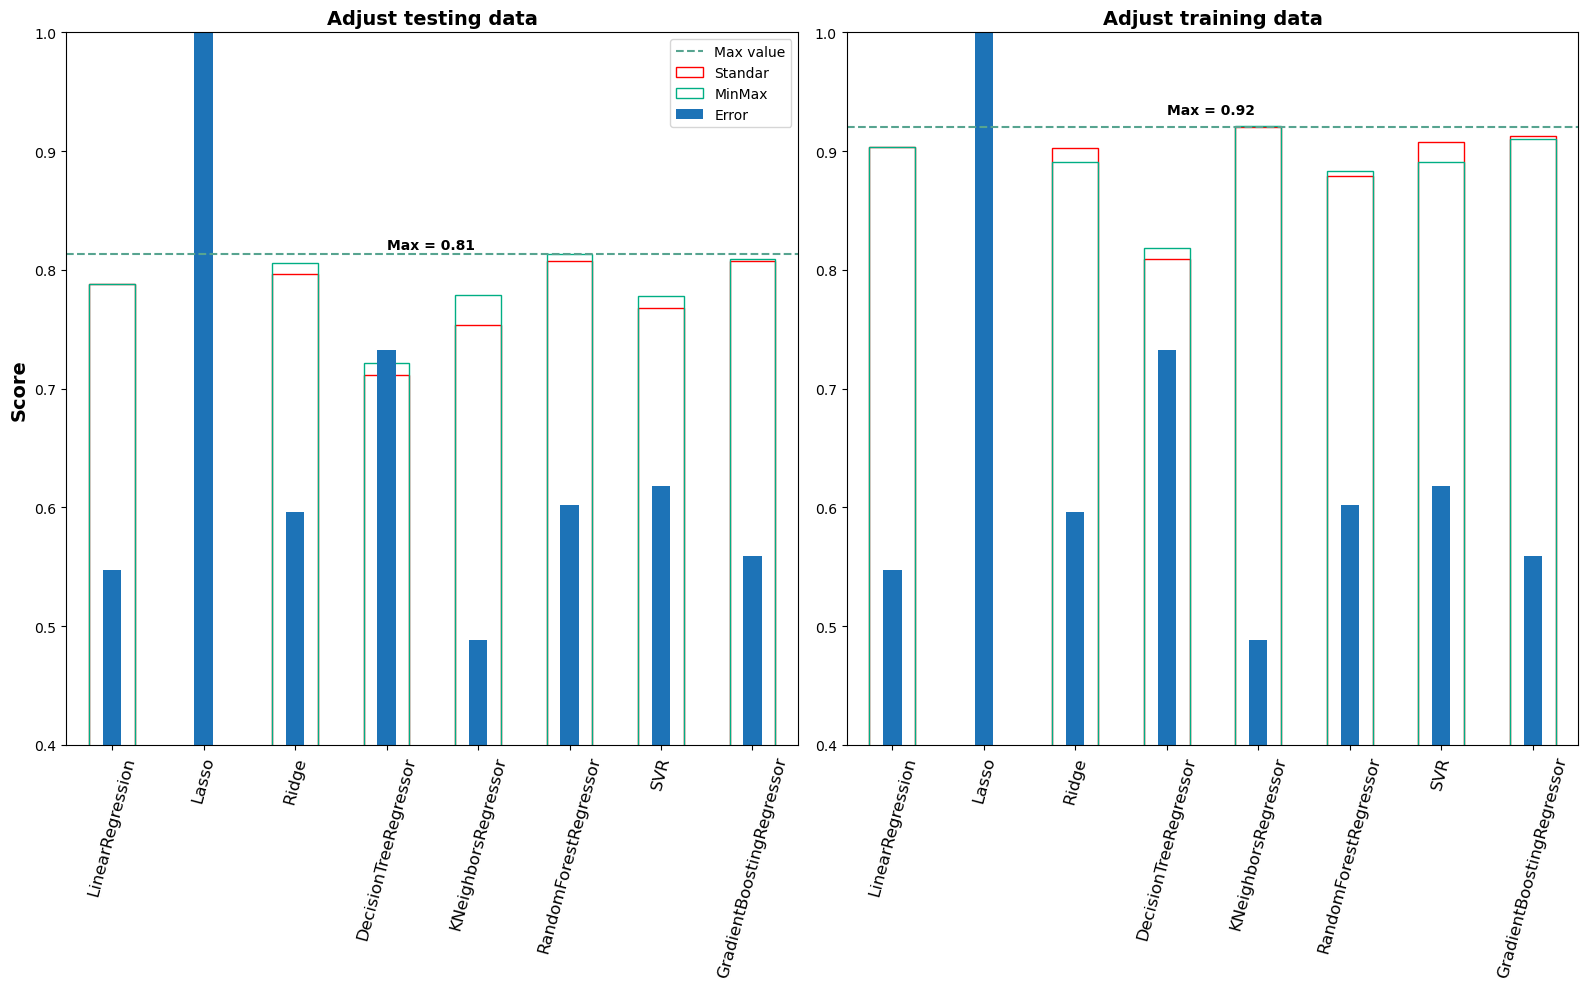

In [28]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(16, 10))

sns.barplot(data=starndar_results, x="model", y="mean", label="Standar", edgecolor= "Red", fill=False, width=0.5,ax=ax[0])
sns.barplot(data=minmax_results, x="model", y="mean", label="MinMax", edgecolor= "#00AE84", fill=False, width=0.5, ax=ax[0])
sns.barplot(data=minmax_results, x="model", y="MAE", label="Error", color= "#0376D1", fill=True, width=0.2, ax=ax[0])
ax[0].axhline(minmax_results["mean"].max(), linestyle="--", label="Max value", color="#57a490")
ax[0].text(3,starndar_results["mean"].max()+0.01, f'Max = {round(starndar_results["mean"].max(), 2)}', color="black", fontweight="bold")
ax[0].set_title("Adjust testing data", fontweight="bold", fontsize=14)
ax[0].set_xticks(range(len(ax[0].get_xticklabels())))
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=75,fontsize=12)
ax[0].set_ylabel("Score", fontweight="bold", fontsize=14)
ax[0].set_ylim(0.4, 1)
ax[0].set_xlabel("")
ax[0].legend()

sns.barplot(data=starndar_results, x="model", y="r2", edgecolor= "Red", fill=False, width=0.5,ax=ax[1])
sns.barplot(data=minmax_results, x="model", y="r2", edgecolor= "#00AE84", fill=False, width=0.5, ax=ax[1])
sns.barplot(data=minmax_results, x="model", y="MAE", color= "#0376D1", fill=True, width=0.2, ax=ax[1])
ax[1].axhline(starndar_results["r2"].max(), linestyle="--", color="#57a490")
ax[1].text(3,minmax_results["r2"].max()+0.01, f'Max = {round(minmax_results["r2"].max(), 2)}', color="black", fontweight="bold")
ax[1].set_xticks(range(len(ax[1].get_xticklabels())))
ax[1].set_title("Adjust training data", fontweight="bold", fontsize=14)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=75,fontsize=12)
ax[1].set_ylim(0.4, 1)
ax[1].set_xlabel("")
ax[1].set_ylabel("")

plt.tight_layout()
plt.show()

In [29]:
# Adjustin modelo to best performance
params_space = {
    "n_neighbors":[2,3,5,7,9],
    "weights":["uniform", "distance"],
    "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size":[2,4,8,16, 32, 64, 128],
    "metric":["euclidean", "manhattan", "chebyshev", "minkowski"],
    "p":[1,2,3,4]
}

search = GridSearchCV(KNeighborsRegressor(),params_space, cv=KFold(n_splits=7))
search.fit(X_train_scaled, y_train_s)
results = pd.DataFrame(search.cv_results_)
print(f"The best parameters for our model are: {search.best_params_}")
print(f"Our most stable mean is: {round(search.best_score_, 2)}%")

The best parameters for our model are: {'algorithm': 'auto', 'leaf_size': 2, 'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Our most stable mean is: 0.81%


In [30]:
results.sort_values(by="mean_test_score", ascending=False).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_metric,param_n_neighbors,param_p,param_weights,...,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
3587,0.000000,0.000000,0.004905,0.007429,brute,4,manhattan,7,2,distance,...,0.562667,0.768062,0.818232,0.934093,0.905212,0.907699,0.801559,0.813932,0.1177,1
551,0.000000,0.000000,0.000156,0.000382,auto,16,manhattan,7,4,distance,...,0.562667,0.768062,0.818232,0.934093,0.905212,0.907699,0.801559,0.813932,0.1177,1
1831,0.000000,0.000000,0.000000,0.000000,ball_tree,32,manhattan,7,4,distance,...,0.562667,0.768062,0.818232,0.934093,0.905212,0.907699,0.801559,0.813932,0.1177,1
547,0.000286,0.000452,0.002606,0.005123,auto,16,manhattan,7,2,distance,...,0.562667,0.768062,0.818232,0.934093,0.905212,0.907699,0.801559,0.813932,0.1177,1
545,0.000564,0.000489,0.000159,0.000390,auto,16,manhattan,7,1,distance,...,0.562667,0.768062,0.818232,0.934093,0.905212,0.907699,0.801559,0.813932,0.1177,1


In [31]:
scores = cross_val_score(search, X_train_scaled, y_train_s, cv=5)
print(f"The real mean is: {round(scores.mean(), 2)}")
print(f"Our confidence limit is: {round((scores.mean()-2*scores.std())*100, 2)}% - {round((scores.mean()+2*scores.std())*100,2)}%")

The real mean is: 0.82
Our confidence limit is: 65.7% - 98.08%


In [32]:
params_space_gbr = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.5],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.5, 0.8, 1.0],
    "max_features": ['sqrt', 'log2']
}

search_gbr = GridSearchCV(GradientBoostingRegressor(),params_space_gbr, cv=KFold(n_splits=5))
search_gbr.fit(X_train_scaled, y_train_s)
results_gbr = pd.DataFrame(search_gbr.cv_results_)
stdv = search_gbr.cv_results_['std_test_score'][search_gbr.best_index_]
mean = round(search_gbr.best_score_, 2)
print(f"The best parameters for our model are: {search_gbr.best_params_}\n")
print(f"Our most stable mean is: {mean}%")
print(f"Our confidence limit is: {round(mean-2*stdv, 2)}% - {round(mean+2*stdv, 2)}%")

The best parameters for our model are: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 1.0}

Our most stable mean is: 0.86%
Our confidence limit is: 0.76% - 0.96%


In [33]:
results_gbr.sort_values(by="mean_test_score", ascending=False).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
506,0.012317,0.006172,0.000000,0.000000,0.1,3,sqrt,1,10,50,1.0,"{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...",0.782373,0.834872,0.892054,0.920502,0.876401,0.861240,0.048180,1
488,0.009378,0.007657,0.000000,0.000000,0.1,3,sqrt,1,2,50,1.0,"{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...",0.778062,0.834389,0.879414,0.940379,0.871091,0.860667,0.053532,2
587,0.014114,0.004964,0.000200,0.000400,0.1,3,log2,1,10,50,1.0,"{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...",0.765682,0.807933,0.884891,0.953774,0.890799,0.860616,0.066282,3
604,0.015626,0.000008,0.000000,0.000000,0.1,3,log2,2,5,50,0.8,"{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...",0.751153,0.841112,0.878038,0.944611,0.885826,0.860148,0.063806,4
569,0.017203,0.010822,0.000204,0.000408,0.1,3,log2,1,2,50,1.0,"{'learning_rate': 0.1, 'max_depth': 3, 'max_fe...",0.767037,0.852239,0.869903,0.924894,0.885733,0.859961,0.052295,5


In [34]:
model = search_gbr.best_estimator_


In [35]:
model.fit(X_train_scaled, y_train_s)
y_predict_s = model.predict(X_test_scaled)

mse = mean_squared_error(y_test_s, y_predict_s)
mae = mean_absolute_error(y_test_s, y_predict_s)
r2 = r2_score(y_test_s, y_predict_s)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.4847319887285872
Mean Absolute Error: 0.5606934320391623
R^2 Score: 0.9011073958036994
